In [1]:
# Reading and understanding the data
#importing libraries
import nltk
import numpy as np
import pandas as pd
import pprint,time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import math


In [2]:
wsj=list(nltk.corpus.treebank.tagged_sents(tagset='universal'))


In [3]:
wsj

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

In [4]:
#converting the list of sents to list of words(word,pos tuples)
tagged_words=[tup for sent in wsj for tup in sent]
print(len(tagged_words))
tagged_words[:10]

100676


[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET')]

In [5]:
'''Exploratory Analysis'''

'Exploratory Analysis'

In [6]:
#unique tags are there in the corpus
tags=[pair[1] for pair in tagged_words]
unique_tags=set(tags)
len(unique_tags)

12

In [7]:
# to count word frequency
from collections import Counter
tag_counts=Counter(tags)
tag_counts

Counter({'NOUN': 28867,
         '.': 11715,
         'NUM': 3546,
         'ADJ': 6397,
         'VERB': 13564,
         'DET': 8725,
         'ADP': 9857,
         'CONJ': 2265,
         'X': 6613,
         'ADV': 3171,
         'PRT': 3219,
         'PRON': 2737})

In [8]:
# the most common tags
tag_counts.most_common

<bound method Counter.most_common of Counter({'NOUN': 28867, 'VERB': 13564, '.': 11715, 'ADP': 9857, 'DET': 8725, 'X': 6613, 'ADJ': 6397, 'NUM': 3546, 'PRT': 3219, 'ADV': 3171, 'PRON': 2737, 'CONJ': 2265})>

In [9]:
# splitting into train and test set
random.seed(1234)
train_set,test_set=train_test_split(wsj,test_size=0.05)
print(len(train_set))
print(len(test_set))

3718
196


In [10]:
# getting list of train tagged words
train_tagged_words=[tup for sent in train_set for tup in sent]
len(train_tagged_words)

95859

In [11]:
#tokens
tokens=[pair[0] for pair in train_tagged_words]

In [12]:
#vocabulary
V=set(tokens)
print(len(V))

12089


In [13]:
#number of tags
T=set([pair[1] for pair in train_tagged_words])
len(T)

12

In [14]:
#Emission Probabilities
#computing p(w/t) and storing in TxV matrix
t=len(T)
v=len(V)
w_given_t=np.zeros((t,v))

In [15]:
w_given_t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
def word_given_tag(word,tag,train_bag=train_tagged_words):
    tag_list=[pair for pair in train_bag if pair[1]==tag]
    count_tag=len(tag_list)
    w_given_tag_list=[pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag=len(w_given_tag_list)
    return (count_w_given_tag,count_tag)

In [17]:
print(word_given_tag('android','NOUN'))

(0, 27491)


In [18]:
# Transition probabilities
def t2_given_t1(t2,t1,train_bag=train_tagged_words):
    tags=[pair[1] for pair in train_bag]
    count_t1=len([t for t in tags if t==t1])
    count_t2_t1=0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1]==t2:
            count_t2_t1+=1
    return (count_t2_t1,count_t1)

In [19]:
print(t2_given_t1('NOUN','VERB'))


(1447, 12936)


In [20]:
# creating txt transition matrix of tags
# each column is t2 , each row is t1
tags_matrix=np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [21]:
tags_matrix

array([[7.73993786e-03, 7.35294120e-03, 9.44272429e-02, 4.84907120e-01,
        7.19814226e-02, 2.24458203e-02, 3.52167189e-02, 3.98606807e-02,
        9.28792544e-03, 5.41795650e-03, 2.08978325e-01, 1.23839006e-02],
       [1.49075733e-03, 1.84555754e-01, 2.08706021e-01, 1.81872398e-02,
        3.45855691e-02, 3.48837227e-02, 2.98151467e-03, 1.14788309e-01,
        3.57781746e-03, 1.37149673e-02, 3.55396539e-01, 2.71317828e-02],
       [5.45830689e-02, 2.70528323e-03, 7.59070665e-02, 2.04487592e-01,
        1.76639091e-02, 1.44175678e-01, 2.60980260e-02, 1.61043927e-01,
        5.42647988e-02, 1.08211329e-02, 6.20623790e-02, 1.86187148e-01],
       [3.49412486e-02, 2.28045769e-02, 2.16682121e-01, 1.68676555e-01,
        6.50123656e-02, 9.09863934e-02, 8.18645656e-02, 3.45547311e-02,
        1.35513291e-01, 5.56586264e-03, 1.11858383e-01, 3.15398872e-02],
       [4.91320039e-04, 2.06354409e-02, 2.07992140e-02, 1.21192271e-02,
        6.55093342e-02, 7.81198815e-02, 4.42188000e-03, 6.60

In [22]:
#convert the matrix to a df for better readability
tags_df=pd.DataFrame(tags_matrix,columns=list(T),index=list(T))
tags_df


,PRON,NUM,X,VERB,ADJ,ADP,ADV,.,DET,CONJ,NOUN,PRT
PRON,0.007740,0.007353,0.094427,0.484907,0.071981,0.022446,0.035217,0.039861,0.009288,0.005418,0.208978,0.012384
NUM,0.001491,0.184556,0.208706,0.018187,0.034586,0.034884,0.002982,0.114788,0.003578,0.013715,0.355397,0.027132
X,0.054583,0.002705,0.075907,0.204488,0.017664,0.144176,0.026098,0.161044,0.054265,0.010821,0.062062,0.186187
VERB,0.034941,0.022805,0.216682,0.168677,0.065012,0.090986,0.081865,0.034555,0.135513,0.005566,0.111858,0.031540
ADJ,0.000491,0.020635,0.020799,0.012119,0.065509,0.078120,0.004422,0.066001,0.004913,0.017196,0.698821,0.010973
ADP,0.068138,0.062060,0.034442,0.008424,0.106846,0.016848,0.013862,0.039774,0.325443,0.000746,0.321924,0.001493
ADV,0.014847,0.031013,0.023095,0.343121,0.129330,0.118113,0.079842,0.137578,0.069614,0.007258,0.032333,0.013857
.,0.066108,0.080429,0.027470,0.089165,0.044763,0.091417,0.052869,0.092768,0.174007,0.058453,0.220031,0.002432
DET,0.003717,0.022185,0.045089,0.040053,0.204221,0.009234,0.012472,0.017508,0.005756,0.000480,0.639045,0.000240
CONJ,0.058797,0.040882,0.008728,0.156638,0.118512,0.051906,0.055581,0.034451,0.119890,0.000459,0.349104,0.005053


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

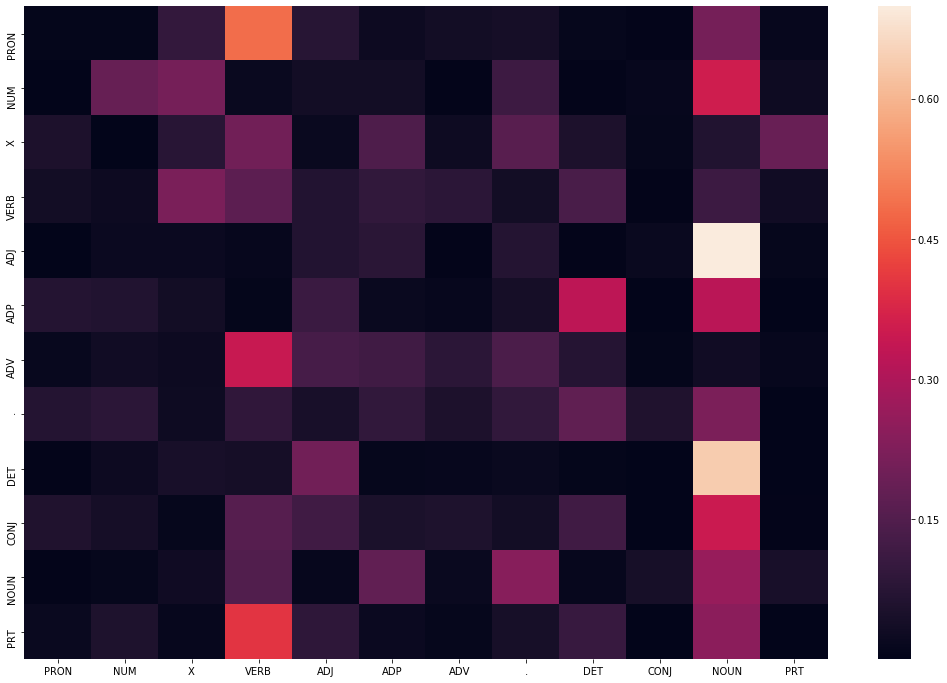

In [24]:
#heatmap of tags matrix
plt.figure(figsize=(18,12))
sns.heatmap(tags_df)

In [25]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1] 
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))



In [53]:
# Viterbi Heuristic
def Viterbi_modified(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag] 
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1] 
            
            
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        print(" pmax {1} for word {0}".format(word,pmax))
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))



In [48]:
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
# print(test_run)

In [49]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [45]:
print("Time taken in seconds: ", difference)
print(tagged_seq)
#print(test_run_base)

Time taken in seconds:  32.57084941864014
[('Another', 'DET'), ('concern', 'NOUN'), (':', '.'), ('The', 'DET'), ('funds', 'NOUN'), ("'", 'PRT'), ('share', 'NOUN'), ('prices', 'NOUN'), ('tend', 'VERB'), ('*-1', 'X'), ('to', 'PRT'), ('swing', 'VERB'), ('more', 'ADV'), ('than', 'ADP'), ('the', 'DET'), ('broader', 'ADJ'), ('market', 'NOUN'), ('.', '.'), ('Komatsu', 'NOUN'), ('predicted', 'VERB'), ('that', 'ADP'), ('for', 'ADP'), ('the', 'DET'), ('fiscal', 'ADJ'), ('year', 'NOUN'), ('ending', 'VERB'), ('March', 'NOUN'), ('31', 'NUM'), ('sales', 'NOUN'), ('will', 'VERB'), ('climb', 'PRON'), ('to', 'PRT'), ('600', 'NUM'), ('billion', 'NUM'), ('yen', 'NOUN'), ('from', 'ADP'), ('566.54', 'PRON'), ('billion', 'NUM'), ('yen', 'NOUN'), (';', '.'), ('pretax', 'NOUN'), ('profit', 'NOUN'), ('was', 'VERB'), ('forecast', 'VERB'), ('*-1', 'X'), ('at', 'ADP'), ('35', 'NUM'), ('billion', 'NUM'), ('yen', 'NOUN'), (',', '.'), ('up', 'ADV'), ('from', 'ADP'), ('28.53', 'PRON'), ('billion', 'NUM'), ('yen', 'NO

In [30]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [31]:
accuracy = len(check)/len(tagged_seq)

In [32]:
accuracy

0.958041958041958

In [33]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [34]:
incorrect_tagged_cases

[[('will', 'VERB'), (('climb', 'PRON'), ('climb', 'VERB'))],
 [('from', 'ADP'), (('566.54', 'PRON'), ('566.54', 'NUM'))],
 [('from', 'ADP'), (('28.53', 'PRON'), ('28.53', 'NUM'))],
 [('information', 'NOUN'), (('dating', 'PRON'), ('dating', 'VERB'))],
 [(',', '.'), (('controlled', 'ADJ'), ('controlled', 'VERB'))],
 [('already', 'ADV'), (('own', 'ADJ'), ('own', 'VERB'))]]

In [54]:
## Testing
sentence_test = '''Android is a mobile operating system developed by Google.
Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.
Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.
Twitter is an online news and social networking service on which users post and interact with messages known as tweets.
Before entering politics, Donald Trump was a domineering businessman and a television personality.
The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.
This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.
Show me the cheapest round trips from Dallas to Atlanta
I would like to see flights from Denver to Philadelphia.
Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.
NASA invited social media users to experience the launch of ICESAT-2 Satellite.'
'''
words = word_tokenize(sentence_test)
start = time.time()
tagged_seq = Viterbi_modified(words)
end = time.time()
difference = end-start

 pmax 0.0 for word Android
 pmax 0.02402794250300363 for word is
 pmax 0.028730962713611887 for word a
 pmax 6.689195198736305e-05 for word mobile
 pmax 0.00035587980107965197 for word operating
 pmax 0.0001344324342074718 for word system
 pmax 5.705471006011845e-05 for word developed
 pmax 0.003968163243480826 for word by
 pmax 0.0 for word Google
 pmax 0.01305712831698913 for word .
 pmax 0.0 for word Android
 pmax 0.012107683975772499 for word has
 pmax 0.0018124645305181183 for word been
 pmax 0.06297086001993556 for word the
 pmax 3.3445975993681526e-05 for word best-selling
 pmax 0.0 for word OS
 pmax 0.0 for word worldwide
 pmax 0.0011273172689376546 for word on
 pmax 0.0 for word smartphones
 pmax 0.0001148858363248565 for word since
 pmax 0.0 for word 2011
 pmax 0.003601186523974613 for word and
 pmax 0.002606937859591123 for word on
 pmax 1.1710146715310509e-05 for word tablets
 pmax 0.0009044779468177605 for word since
 pmax 0.0 for word 2013
 pmax 0.01305712831698913 for wo

In [55]:
print(tagged_seq)
print(difference)

[('Android', 'PRON'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'PRON'), ('.', '.'), ('Android', 'PRON'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'PRON'), ('worldwide', 'PRON'), ('on', 'ADP'), ('smartphones', 'PRON'), ('since', 'ADP'), ('2011', 'PRON'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'PRON'), ('.', '.'), ('Google', 'PRON'), ('and', 'CONJ'), ('Twitter', 'PRON'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'PRON'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'PRON'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'PRON'), ("'s", 'VERB'), ('firehose', 'PRON'), ('.', '.'), ('Twitter', 'PRON'), ('is', 'VERB'), ('an', 'DET'), ('online', 'PRON'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'

In [56]:
# using modified viterbi
tag_seq=Viterbi_modified(words)
print(tag_seq)

 pmax 0.0 for word Android
 pmax 0.02402794250300363 for word is
 pmax 0.028730962713611887 for word a
 pmax 6.689195198736305e-05 for word mobile
 pmax 0.00035587980107965197 for word operating
 pmax 0.0001344324342074718 for word system
 pmax 5.705471006011845e-05 for word developed
 pmax 0.003968163243480826 for word by
 pmax 0.0 for word Google
 pmax 0.01305712831698913 for word .
 pmax 0.0 for word Android
 pmax 0.012107683975772499 for word has
 pmax 0.0018124645305181183 for word been
 pmax 0.06297086001993556 for word the
 pmax 3.3445975993681526e-05 for word best-selling
 pmax 0.0 for word OS
 pmax 0.0 for word worldwide
 pmax 0.0011273172689376546 for word on
 pmax 0.0 for word smartphones
 pmax 0.0001148858363248565 for word since
 pmax 0.0 for word 2011
 pmax 0.003601186523974613 for word and
 pmax 0.002606937859591123 for word on
 pmax 1.1710146715310509e-05 for word tablets
 pmax 0.0009044779468177605 for word since
 pmax 0.0 for word 2013
 pmax 0.01305712831698913 for wo

In [57]:
# lets find the words which are not in training set 
untagged_words=[x for x in words if x not in tokens]

In [58]:
untagged_words

['Android',
 'Google',
 'Android',
 'OS',
 'worldwide',
 'smartphones',
 '2011',
 '2013',
 'Google',
 'Twitter',
 '2015',
 'Google',
 'Twitter',
 'firehose',
 'Twitter',
 'online',
 'interact',
 'messages',
 'tweets',
 'domineering',
 'personality',
 '2018',
 'FIFA',
 'Cup',
 '21st',
 'FIFA',
 'Cup',
 'tournament',
 'contested',
 'Cup',
 '11th',
 'trips',
 'arriving',
 'NASA',
 'invited',
 'ICESAT-2',
 'Satellite']

As we can see that most of the words are either noun or verb so we apply rule based tagger to assign tag for unknow words

In [60]:
# specify patterns for tagging
# example from the NLTK book
patterns = [
    (r'(.*ing|.*ed)$', 'VERB'),              # gerund
    (r'\d+','NUM'),
    (r'.*ity$','ADV'),
    (r'.*', 'NOUN'),
    
]
regexp_tagger = nltk.RegexpTagger(patterns)
# help(regexp_tagger)
rule_based_tagger = nltk.RegexpTagger(patterns)

# lexicon backed up by the rule-based tagger
lexicon_tagger = nltk.UnigramTagger(train_set, backoff=rule_based_tagger)


In [ ]:
t2_given_t1('NOUN','.')

In [71]:
word='networking'

In [75]:
lexicon_tagger.tag([word])[0][1]

'NOUN'

In [67]:
print(lexicon_tagger.tag(words)[1])

('is', 'VERB')


In [ ]:
train_tagged_words[0]

In [ ]:
# Lexicon (or unigram tagger)
unigram_tagger = nltk.UnigramTagger(train_set)
unigram_tagger.evaluate(test_set)

In [ ]:
#lexicon based tagger
unigram_tagger = nltk.UnigramTagger(train_set)
print(unigram_tagger.
